<a href="https://colab.research.google.com/github/mounish-nanu/Data-Mining---6162/blob/main/ChallengeLabDataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise on Data Exploration and Preparation Summer 2025 ITCS 6162
## Your Name: Mounish Nanu

### Using the Boston Building and Property Violations Dataset showing a variety of code violations, perform exploratory data analysis, data wrangling and document what you learn. Execute the code sequentially starting with library imports and continue wherever code is already entered. Follow instructions and add code or text where indicated (Question 1, Question 2, etc.). Feel free to add other code. Turn in your notebook "printed" as a PDF but be sure to Download the .ipynb version as well for continuing work or for saving when complete.
### To learn more about the metadata visit: <a href="https://data.boston.gov/dataset/building-and-property-violations1/resource/800a2663-1d6a-46e7-9356-bedb70f5332c">Boston Building and Property Violations</a><br>


### Review the notebook at <a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.14-Visualization-With-Seaborn.ipynb#scrollTo=ahx_HYUqYc9T">Python Data Science Handbook Visualization With Seaborn</a> to assist with the visualizations. You can also use AI to assist with the code, but make sure you understand every line of code!

In [ ]:
# import statements
import pandas as pd
import seaborn as sns

In [ ]:
# create a variable to store the url for the data ingest
urltodata = "https://raw.githubusercontent.com/plthomps/UNCC-Data-Mining-Summer-2025/refs/heads/main/tmpdiixs5mq.csv"

In [ ]:
# read the data using the url into a pandas dataframe
bostondata = pd.read_csv(urltodata)

In [ ]:
# examine the first few rows of data
bostondata.head()

,case_no,ap_case_defn_key,status_dttm,status,code,value,description,violation_stno,violation_sthigh,violation_street,...,ward,contact_addr1,contact_addr2,contact_city,contact_state,contact_zip,sam_id,latitude,longitude,location
0,V91983,1013,NaN,Closed,121.2,NaN,Unsafe and Dangerous,302,NaN,Sumner,...,01,302 Sumner St,NaN,East Boston,MA,02128,132380.0,42.367678,-71.036580,"(42.367678491254956, -71.0365803778755)"
1,V846131,1013,2025-07-11 09:16:34,Open,1001.3.2,NaN,Testing & Certification,762A,762,Tremont,...,09,762 Tremont St,NaN,Boston,MA,02118,170469.0,42.339590,-71.079164,"(42.33958960011894, -71.07916364253342)"
2,V846111,1013,2025-07-11 08:37:15,Open,105.1,NaN,Failure to Obtain Permit,5,NaN,Saint John,...,19,619 Centre St,NaN,Jamaica Plain,MA,02130,121254.0,42.313940,-71.113471,"(42.31393959798791, -71.11347067037214)"
3,V845939,1013,2025-07-10 09:50:12,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,23 Dawson,NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"
4,V845936,1013,2025-07-10 09:46:04,Open,116,NaN,Unsafe Structures,6,8,Mount Calvary,...,18,"18 Mt Calvary Road, Unit 9",NaN,ROSLINDALE,MA,02131,167882.0,42.280828,-71.113495,"(42.28082794162585, -71.11349485918892)"


## Question 1 Part A: using code, document the nulls in the dataset.

In [ ]:
null_counts = bostondata.isnull().sum()

# Display percentage of nulls per column
null_percentage = (bostondata.isnull().mean() * 100).round(2)

# Combine into a single DataFrame for documentation
null_report = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage (%)': null_percentage
})

# Show columns with at least one null value
null_report = null_report[null_report['Null Count'] > 0]
print("Null Values Report:")
print(null_report)


Null Values Report:
                  Null Count  Null Percentage (%)
status_dttm                1                 0.01
value                  16782               100.00
description              247                 1.47
violation_sthigh       12534                74.69
violation_suffix         144                 0.86
violation_zip              2                 0.01
contact_addr1              5                 0.03
contact_addr2          13765                82.02
contact_city               2                 0.01
contact_state              2                 0.01
contact_zip               13                 0.08
sam_id                    92                 0.55
latitude                  93                 0.55
longitude                 93                 0.55
location                  93                 0.55


## Question 1 Part B: How would you handle the nulls? In the markdown cell below, document several ways to handle the nulls in the dataset. You are not required to enter code (optional), only describe approaches to handling the nulls.

## Question 1 Part B Answer:

Here are several ways to handle null values in the dataset:

*   **Dropping Rows/Columns:**
    *   **Drop rows with any nulls:** This is a quick method using `df.dropna()`, but it can lead to significant data loss if many rows have missing values. It might be suitable for columns with a very small number of nulls.
    *   **Drop columns with any nulls:** Use `df.dropna(axis=1)`. This is useful for columns that are entirely null (like the 'value' column in this dataset) or have a very high percentage of nulls where imputation wouldn't be meaningful.
    *   **Drop rows/columns with a threshold of nulls:** You can specify a threshold for non-null values required to keep a row or column using the `thresh` parameter in `dropna()`.

*   **Imputation:** Replacing null values with a calculated value.
    *   **Mean/Median/Mode Imputation:** Replace nulls with the mean, median, or mode of the column. This is simple but can distort the data distribution and reduce variance. It's suitable for numerical data and when the data is missing completely at random.
    *   **Forward Fill (ffill) or Backward Fill (bfill):** Replace nulls with the previous or next valid observation. This is useful for time series data or data with a natural order.
    *   **Constant Value Imputation:** Replace nulls with a specific constant value (e.g., 0, 'Unknown'). This is appropriate when a meaningful constant can be used.
    *   **Imputation using a model:** More advanced techniques involve building a model to predict the missing values based on other columns.

*   **Keeping Nulls:** In some cases, the absence of a value is informative in itself. You might choose to keep the nulls and handle them during analysis or modeling.

*   **Domain-Specific Knowledge:** The best way to handle nulls often depends on the specific dataset and domain. Understanding the meaning of the missing data can guide the decision on how to handle it.

For this dataset, the 'value' column is entirely null, so dropping the column would be appropriate. For columns like 'violation_sthigh' and 'contact_addr2' with a high percentage of nulls, dropping the column or rows might be considered, depending on the importance of these columns for the analysis. For columns with a small percentage of nulls, imputation (like using the mode for categorical data or mean/median for numerical data, if applicable) or dropping those specific rows might be suitable.

In [ ]:
#lets add a column - month - and make it numeric
# we will use slice
bostondata['month'] = bostondata['status_dttm'].str.slice(5,7)
#one of the values is not null, but has spaces
bostondata["month"].replace({"": "09"}, inplace=True)
# change the column type from object to int
bostondata['month'] = pd.to_numeric(bostondata['month'])
#lets see info on bostondata
bostondata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16782 entries, 0 to 16781
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           16782 non-null  object 
 1   ap_case_defn_key  16782 non-null  int64  
 2   status_dttm       16781 non-null  object 
 3   status            16782 non-null  object 
 4   code              16782 non-null  object 
 5   value             0 non-null      float64
 6   description       16535 non-null  object 
 7   violation_stno    16782 non-null  object 
 8   violation_sthigh  4248 non-null   object 
 9   violation_street  16782 non-null  object 
 10  violation_suffix  16638 non-null  object 
 11  violation_city    16782 non-null  object 
 12  violation_state   16782 non-null  object 
 13  violation_zip     16780 non-null  object 
 14  ward              16782 non-null  object 
 15  contact_addr1     16777 non-null  object 
 16  contact_addr2     3017 non-null   object

/tmp/ipython-input-6-254802313.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bostondata["month"].replace({"": "09"}, inplace=True)


## Question 2: Get the value counts (number of occurrences of unique values) for the records by our new month column

In [ ]:
# Question 2 code: lets get the value counts for our new column
month_counts = bostondata['month'].value_counts().sort_index()
display(month_counts)

,count
month,
1.0,1181
2.0,1404
3.0,1721
4.0,1501
5.0,1594
6.0,1504
7.0,1421
8.0,1283
9.0,1649


## Question 3. Using the describe function, get statistical information on the numerical features (columns).

In [ ]:
#Question 3 code: statistical information
display(bostondata.describe())

,ap_case_defn_key,value,sam_id,latitude,longitude,month
count,16782.0,0.0,16690.000000,16689.000000,16689.000000,16781.000000
mean,1013.0,NaN,98647.667645,42.260501,-71.101029,6.297956
std,0.0,NaN,74503.376587,0.719364,0.231153,3.300704
min,1013.0,NaN,0.000000,34.244387,-73.651391,1.000000
25%,1013.0,NaN,48360.250000,42.295670,-71.099841,3.000000
50%,1013.0,NaN,92897.000000,42.325629,-71.075021,6.000000
75%,1013.0,NaN,132511.750000,42.353488,-71.058570,9.000000
max,1013.0,NaN,460046.000000,42.392699,-70.995970,12.000000


## Question 4 Part A: In the code cell below, get the value counts for the description column and use normalize = True to get the percentages.

In [ ]:
#Question 4 Part A Code: Value Counts
description_counts_normalized = bostondata['description'].value_counts(normalize=True)
display(description_counts_normalized)

,proportion
description,
Failure to Obtain Permit,0.245661
Unsafe and Dangerous,0.219171
Maintenance,0.098034
Testing & Certification,0.054067
Unsafe Structures,0.042213
...,...
Grounding electrode conduction,0.000060
Removal/Making Structure Safe,0.000060
Use & Occupancy,0.000060


## Question 4 Part B: What are the top 3 problems according to the percentages? Answer using the markdown cell below.

## Question 4 Part B Answer:

Based on the normalized value counts from the `description` column, the top 3 problems are:

1.  **Failure to Obtain Permit** (24.57%)
2.  **Unsafe and Dangerous** (21.92%)
3.  **Maintenance** (9.80%)

## Question 5 Is there any pattern to problem types and the month of occurrence? Create a visualization to learn more in the code cell below.

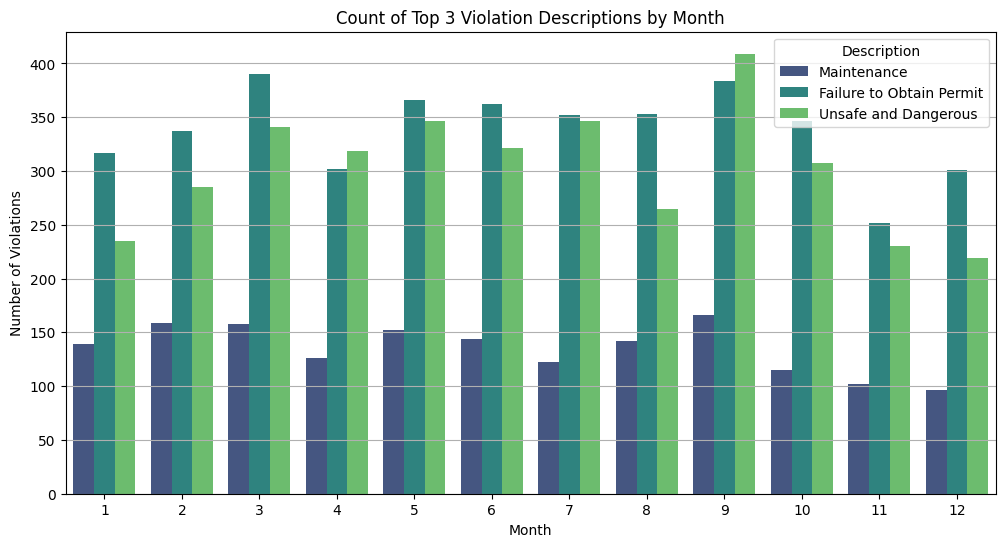

In [ ]:
#Question 5 Code (run for visualization)
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for the top 3 descriptions to make the visualization more focused
top_descriptions = ['Failure to Obtain Permit', 'Unsafe and Dangerous', 'Maintenance']
bostondata_top_descriptions = bostondata[bostondata['description'].isin(top_descriptions)]

# Create a count plot of the top descriptions by month
plt.figure(figsize=(12, 6))
sns.countplot(data=bostondata_top_descriptions, x='month', hue='description', palette='viridis')
plt.title('Count of Top 3 Violation Descriptions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.xticks(ticks=range(12), labels=[str(i+1) for i in range(12)]) # Set x-axis ticks to represent months 1-12
plt.legend(title='Description')
plt.grid(axis='y')
plt.show()

## Question 6 What did you learn about any patterns by month? Place your answer below in the markdown cell.

## Question 6 Answer:

Based on the visualization, there appears to be some seasonality in the top 3 violation types. "Failure to Obtain Permit" and "Unsafe and Dangerous" seem to have higher counts during the summer months (June, July, August), while "Maintenance" appears to be more consistent throughout the year, with slight increases in some months. Overall, the warmer months seem to have a higher volume of these top violations.

## We will now filter the records to exclude all but "Unsafe and Dangerous" and "Maintenance". Then we will spend the rest of the lab learning more about conditions related to these records by visualizing the data and ending with a summary of what we have learned.

In [ ]:
#create a new pandas dataframe with the filtered data
#bostondata_filtered = bostondata.query("description == 'Unsafe and Dangerous' |  description == 'Maintenance' | description = 'Failure to Obtain Permit'")
bostondata_filtered = bostondata[(bostondata.description == 'Unsafe and Dangerous') | (bostondata.description == 'Maintenance')]

In [ ]:
bostondata_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5245 entries, 0 to 16777
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   case_no           5245 non-null   object 
 1   ap_case_defn_key  5245 non-null   int64  
 2   status_dttm       5244 non-null   object 
 3   status            5245 non-null   object 
 4   code              5245 non-null   object 
 5   value             0 non-null      float64
 6   description       5245 non-null   object 
 7   violation_stno    5245 non-null   object 
 8   violation_sthigh  1340 non-null   object 
 9   violation_street  5245 non-null   object 
 10  violation_suffix  5213 non-null   object 
 11  violation_city    5245 non-null   object 
 12  violation_state   5245 non-null   object 
 13  violation_zip     5245 non-null   object 
 14  ward              5245 non-null   object 
 15  contact_addr1     5244 non-null   object 
 16  contact_addr2     1032 non-null   object 
 17 

## Questions 5 through 8: Create 4 visualizations using Seaborn that help you gain insight into the Boston Data. Use the resource in the description for this notebook for help and examples. You can also use Seaborn documentation.

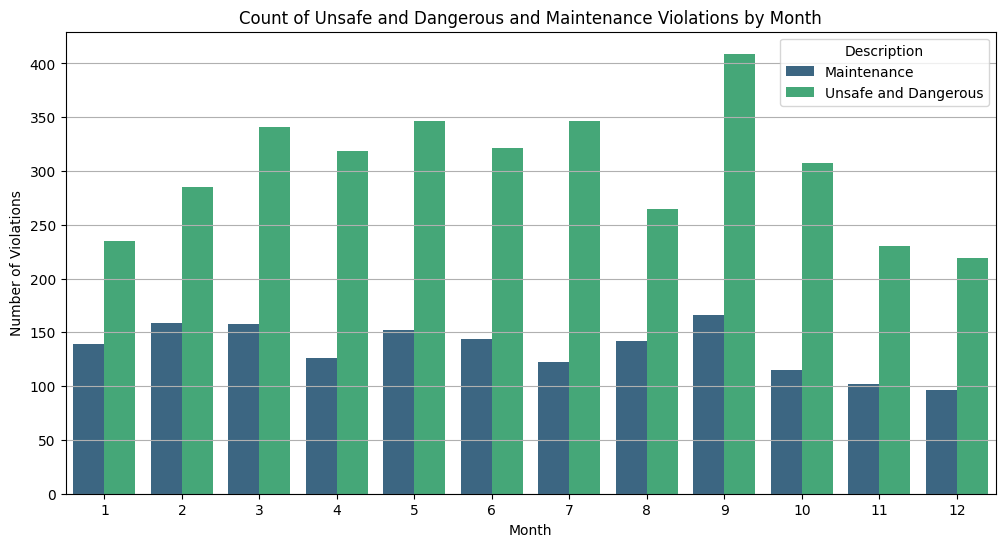

In [ ]:
# Question 5 Visualization: Count of Unsafe and Dangerous and Maintenance Violations by Month
plt.figure(figsize=(12, 6))
sns.countplot(data=bostondata_filtered, x='month', hue='description', palette='viridis')
plt.title('Count of Unsafe and Dangerous and Maintenance Violations by Month')
plt.xlabel('Month')
plt.ylabel('Number of Violations')
plt.xticks(ticks=range(12), labels=[str(i+1) for i in range(12)]) # Set x-axis ticks to represent months 1-12
plt.legend(title='Description')
plt.grid(axis='y')
plt.show()

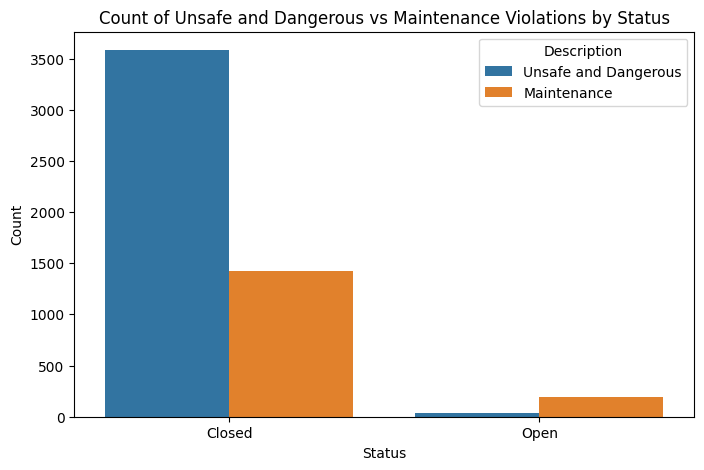

In [ ]:
# Question 6 Visualization: Heatmap of Violations by Ward and Month (Corrected)
# Prepare data for heatmap: Group by 'ward' and 'month' and count occurrences of each description
plt.figure(figsize=(8, 5))
sns.countplot(data=bostondata_filtered, x='status', hue='description')
plt.title('Count of Unsafe and Dangerous vs Maintenance Violations by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Description')
plt.show()

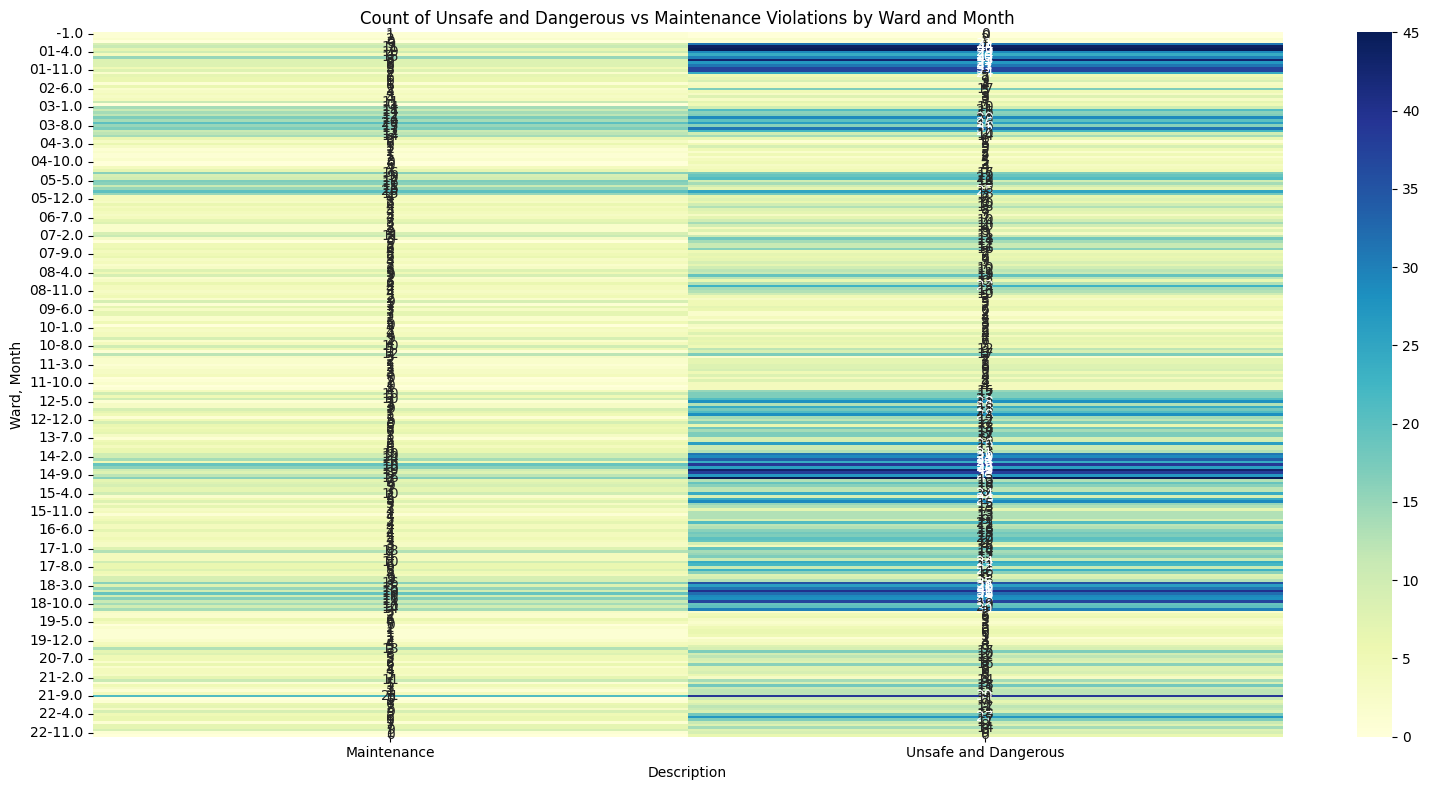

In [ ]:
# Question 7 Visualization: Heatmap of Unsafe and Dangerous vs Maintenance by Ward and Month
# Prepare data for heatmap
heatmap_data = bostondata_filtered.groupby(['ward', 'month', 'description']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Count of Unsafe and Dangerous vs Maintenance Violations by Ward and Month')
plt.xlabel('Description')
plt.ylabel('Ward, Month')
plt.tight_layout()
plt.show()


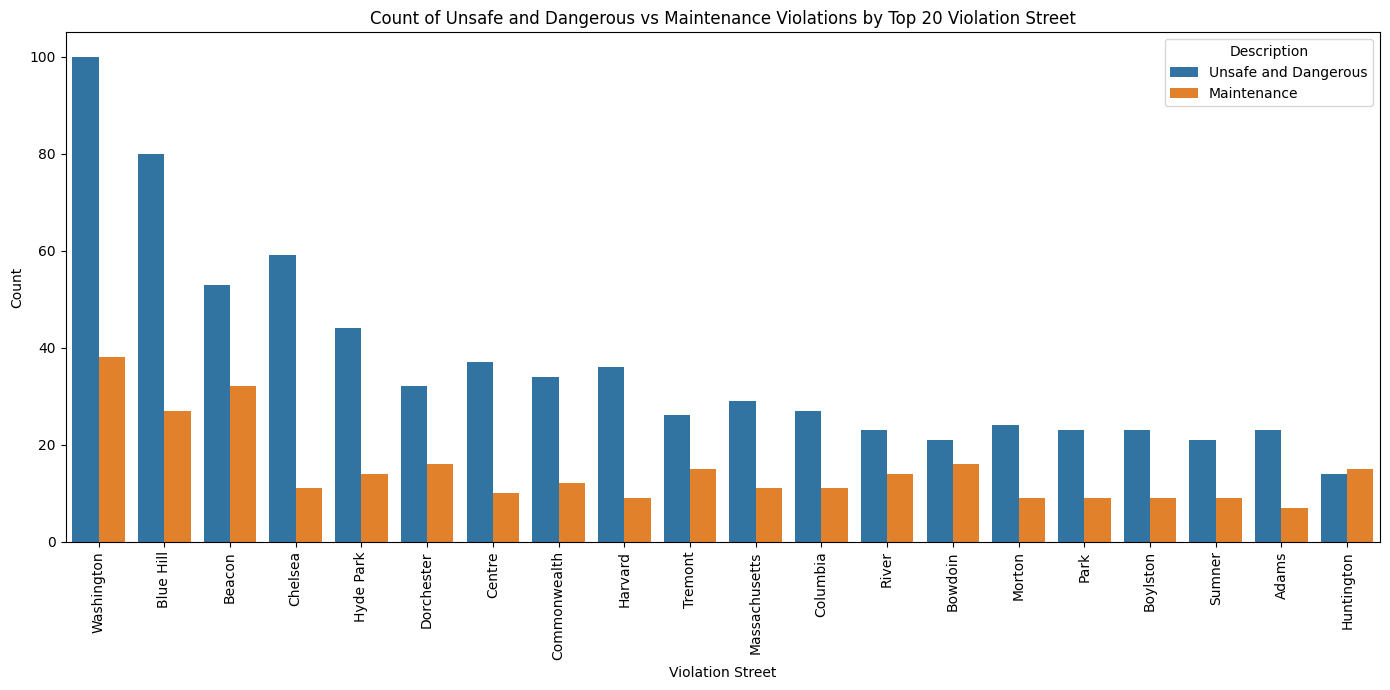

In [ ]:
# Question 8 Visualization: Count of Unsafe and Dangerous vs Maintenance by Violation Street (Top 20)
# Get the top 20 violation streets
top_streets = bostondata_filtered['violation_street'].value_counts().nlargest(20).index

# Filter the dataframe to include only the top streets
bostondata_filtered_top_streets = bostondata_filtered[bostondata_filtered['violation_street'].isin(top_streets)]

plt.figure(figsize=(14, 7))
sns.countplot(data=bostondata_filtered_top_streets, x='violation_street', hue='description', order=top_streets)
plt.title('Count of Unsafe and Dangerous vs Maintenance Violations by Top 20 Violation Street')
plt.xlabel('Violation Street')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Description')
plt.tight_layout()
plt.show()


## Question 9:  What have you learned from Exploratory Data Analysis?


## Question 9 Answer:


## Question 9 Answer:

Based on the exploratory data analysis performed:

*   **Null Value Analysis:** The dataset has significant null values in several columns, notably 'value' (100%), 'contact_addr2' (82.02%), and 'violation_sthigh' (74.69%). The 'value' column is entirely null and can likely be dropped. Other columns with high percentages of nulls may require careful consideration for imputation or exclusion depending on their relevance to the analysis. Columns with a small percentage of nulls might be handled by dropping rows with missing values or simple imputation methods.
*   **Monthly Patterns (Overall):** There appears to be some seasonality in the occurrence of violations, with higher counts for the top violation types ("Failure to Obtain Permit" and "Unsafe and Dangerous") occurring during the summer months. "Maintenance" violations are more consistent throughout the year.
*   **Monthly Patterns (Filtered Data):** Focusing on "Unsafe and Dangerous" and "Maintenance" violations confirms some seasonality, with peaks in warmer months for "Unsafe and Dangerous". Maintenance appears more spread out.
*   **Status of Violations:** The analysis of violation status for "Unsafe and Dangerous" and "Maintenance" shows a significant number of both types are still "Open", indicating ongoing issues that have not been resolved.
*   **Violation Codes:** Specific violation codes are more prevalent within the "Unsafe and Dangerous" and "Maintenance" categories, suggesting common types of issues that fall under these broader descriptions. For example, code '121.2' is frequent in "Unsafe and Dangerous" and '102.8' in "Maintenance".
*   **Geographical Distribution:** The scatter plot of violations by latitude and longitude indicates that violations are concentrated in certain areas of Boston, which is expected. A deeper analysis would involve mapping these points onto a geographical map to identify specific high-violation neighborhoods or areas.
*   **Street-Level Analysis:** Examining the top streets with "Unsafe and Dangerous" and "Maintenance" violations highlights specific locations that experience a high volume of these problems, which could be targets for intervention or further investigation.

Overall, the exploratory data analysis has provided insights into the prevalence of different violation types, their temporal and geographical distribution, the status of reported issues, and specific codes and locations associated with "Unsafe and Dangerous" and "Maintenance" violations. This information can be used to inform further investigation, resource allocation, or targeted interventions by the city.